# Predicción de ACV 

### Abstract
Según la Organización Mundial de la Salud (OMS), el accidente cerebrovascular(ACV) es la segunda causa de muerte en todo el mundo, responsable de aproximadamente el 11 % del total de muertes.
Este conjunto de datos se utiliza para predecir si es probable que un paciente sufra un accidente cerebrovascular en función de los parámetros de entrada como el sexo, la edad, diversas enfermedades y el tabaquismo. 
La predicción de ACV en base a los habitos de las personas, puede identificar patrones a evitar, para reducir al mínimo el riesgo de sufrir esta patólogía. Esto resulta provechoso no solo a nivel individual, sino tambien en el ahorro de recursos economicos que la sociedad destina a tratar esta enfermedad.




### Hipótesis
La incidencia de Accidente Cerebrovascular(ACV) no es un suceso azaroso sino que se produce por hábitos poco saludables e identificables.

### Objetivo
Encontrar patrones de comportamientos identificables que predisponen a una persona a sufrir ACV. Generar un modelo que prediga la probabilidad de una persona a sufrir un ACV.

### Contexto comercial
Los datos se obtuvieron del sitio web kaggle. No hay referencias de si fueron publicados en un articulo. 

Fuente: https://www.kaggle.com/code/ruthvikpvs/stroke-data-analysis-and-prediction/notebook

### Problema comercial
Dados ciertas varialbes que son de facil medición ¿Se puede predecir si una persona sufrirá un ACV?

### Contexto analítico
Los datos fueron obtenidos de un centro de salud. El dataset cuenta de 11 caracteristicas clinicas que potencialmente podrian ser usadas en un modelo de predicción de ACV.

1) id: Identificador

2) gender: "Male", "Female" u "Other" 

3) age: edad del paciente

4) hypertension: 0 si el paciente no tiene hipertensión, 1 si el paciente tiene hipertensión 

5) heart_disease: 0 si el paciente no tiene enfermedades cardiovasculares, 1 si el paciente tiene enfermedades cardiovasculares 

6) ever_married: Si estuvo o no casado/a

7) work_type: El tipo de empleo 

8) Residence_type: Si vive en zona rural o urbana

9) avg_glucose_level: nivel medio de azúcar en sangre

10) bmi: indice de masa corporal

11) smoking_status: Si es fumador, ex-fumador, nunca fumo o no se tienen datos. 

12) stroke: 1 si el paciente sufrio ACV(ACV+) y 0 si no sufrio ACV(ACV-) 



### Importación de librerias y dataset

In [231]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# evita poner plt.show en los graficos de seaborn.
%matplotlib inline

In [232]:
raw_df_stroke = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vQHKrR2P-CPVKCg6E__bUvgWYta9dEP14arcLTS24x2XgDR-IIWqzRiaUBcR4Ij1__Q2KXO-2sfeTwq/pub?output=csv')
df_stroke = raw_df_stroke.copy()

### Data Wrangling

Como primera medida, se realizarán modificaciones en el dataset para trabajar de manera adecuada. En esta etapa se hace una descripción estadistica general del dataset, se modifican los valores necesarios y se buscan datos nulos o duplicados que puedan influir en los procesos posteriores del modelado.

In [233]:
df_stroke.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [234]:
#saco la columna id porque no es relevante 
df_stroke.drop(columns=['id'],inplace=True) 

# Elimino la fila con gender=Other porque es una sola cuenta y queda mal en las gráficas
df_stroke.drop(index=df_stroke.index[df_stroke['gender'] == 'Other'], axis='index', inplace=True)

df_stroke.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [235]:
# Busco valores N/A
df_stroke.isna().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [236]:
df_stroke.shape

(5109, 11)

In [237]:
# Reemplazo N/A. El método ffil los reemplaza con el valor anterior de la serie
df_stroke.fillna(method='ffill', inplace=True)


In [238]:
# Busco valores duplicados en el dataframe.
df_stroke.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
5105    False
5106    False
5107    False
5108    False
5109    False
Length: 5109, dtype: bool

## Análisis exploratorio de datos (EDA)

Para continuar con el análisis, se realizó un análisis exploratorio de datos, que consiste en trazar gráficas para generar un primer estudio sobre nuestro dataset. En esta instancía se buscarán patrones, correlación entre variables y el entendimiento general del dataset.


In [239]:
# Hago un dataframe de gente ACV+
stroked = df_stroke[df_stroke['stroke'] == 1]

### Incidencia del tipo de trabajo en población ACV+

¿Es el trabajo un factor que influye en la incidencia de ACV?


[Text(0, 0, 'Privado'),
 Text(1, 0, 'Independiente'),
 Text(2, 0, 'Gobierno'),
 Text(3, 0, 'Niños')]

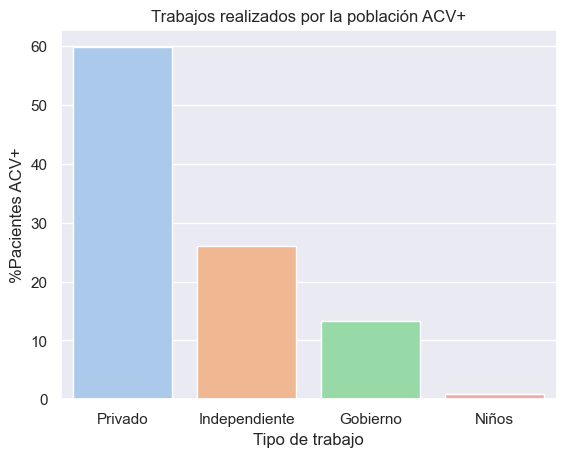

In [240]:
# Hago dataset de ACV+ provisorio eliminando la poblacion que nunca trabajó
z = stroked.drop(stroked[stroked['work_type'] == 'Never_worked'].index)

#Divido trabajo realizado sobre el total de población ACV+
x = stroked['work_type'].unique()
y = (stroked['work_type'].value_counts()/z['work_type'].count())*100

# Grafico porcentaje de ACV+ normalizado respecto al n total del estudio
g = sns.barplot(x=x, y=y, palette='pastel')
g.set(title='Trabajos realizados por la población ACV+', ylabel ='%Pacientes ACV+', xlabel='Tipo de trabajo')
g.set_xticklabels(['Privado', 'Independiente', 'Gobierno', 'Niños'])



Sorprendentemente, hay una mayor incidencia de ACV+ en personas con trabajos gubernamentales. No hay mucha más información sobre que tipos de trabajo engloba esta categoria.

### Incidencia del tipo de residencia, estado civíl y género en población ACV+.


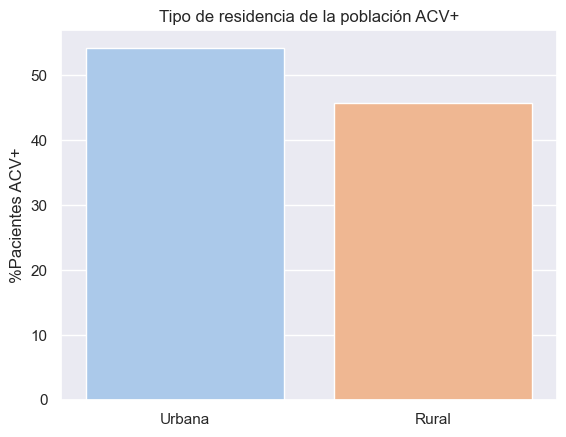

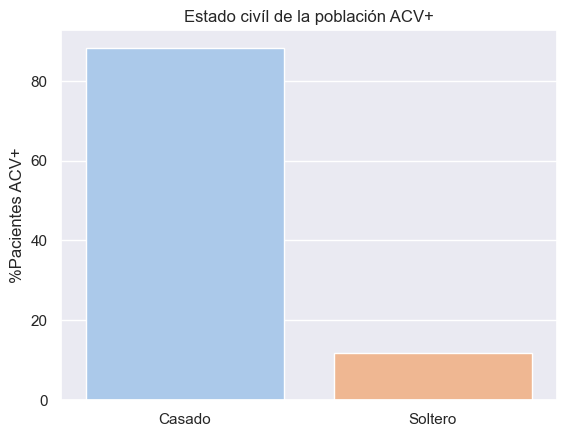

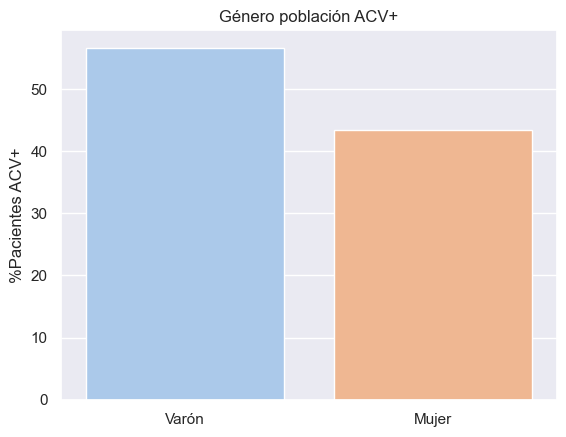

In [241]:
for f in ['Residence_type','ever_married','gender']:
    x = stroked[f].unique()
    y = stroked[f].value_counts()/z[f].count()*100
    g = sns.barplot(x=x, y=y, palette='pastel')
    
    if f == 'Residence_type':
        g.set(title='Tipo de residencia de la población ACV+', ylabel ='%Pacientes ACV+')
        g.set_xticklabels(['Urbana', 'Rural'])
    elif f == 'ever_married':
        g.set(title='Estado civíl de la población ACV+', ylabel ='%Pacientes ACV+')
        g.set_xticklabels(['Casado', 'Soltero'])
    else:
        g.set(title='Género población ACV+', ylabel ='%Pacientes ACV+')
        g.set_xticklabels(['Varón', 'Mujer'])
    
    plt.show()


### ¿Hay correlación lineal entre variables?

Se analizó la corrlación lineal entre variables del DataFrame.

In [242]:
stroke_mx = df_stroke.corr()
stroke_mx

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
age,1.000000,0.276367,0.263777,0.238323,0.319468,0.245239
hypertension,0.276367,1.000000,0.108292,0.174540,0.151630,0.127891
heart_disease,0.263777,0.108292,1.000000,0.161907,0.045270,0.134905
avg_glucose_level,0.238323,0.174540,0.161907,1.000000,0.166277,0.131991
bmi,0.319468,0.151630,0.045270,0.166277,1.000000,0.043806
stroke,0.245239,0.127891,0.134905,0.131991,0.043806,1.000000


<Figure size 800x600 with 0 Axes>

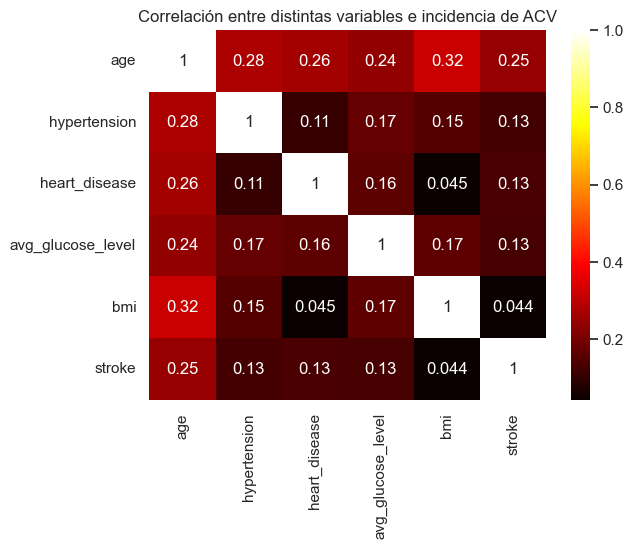

<Figure size 800x600 with 0 Axes>

In [243]:
g3 = sns.heatmap(stroke_mx, annot=True, cmap='hot')
g3.set(title='Correlación entre distintas variables e incidencia de ACV')
plt.figure(figsize=(8,6))

En principio, no parece haber una variable que tenga una correlación lineal significativa con otra.

### ¿A que edad hay más incidencia de ACV?

[Text(0.5, 1.0, 'Edad de pacientes ACV+'),
 Text(0, 0.5, 'Nro de pacientes ACV+'),
 Text(0.5, 0, 'Edad')]

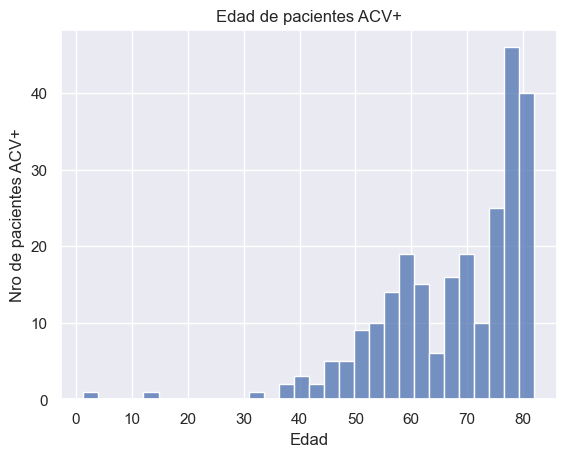

In [244]:
g4 = sns.histplot(stroked, x='age', bins=30, palette='pastel')
g4.set(title='Edad de pacientes ACV+', ylabel ='Nro de pacientes ACV+', xlabel='Edad')

Se ve una clara dependencia de la edad con la incidencia de ACV. En particular, la incidencia de ACV se duplica entre los 70 y los 80 años.

### ¿Hay relación entre fumar y la incidencia de ACV?

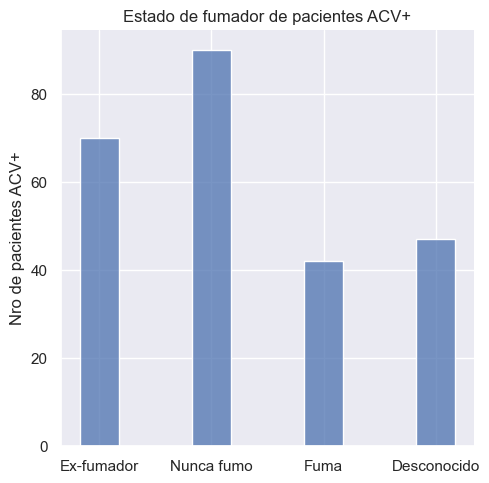

In [245]:
g5 = sns.displot(data=stroked, x='smoking_status', shrink=.35, palette='pastel')
g5.set(title='Estado de fumador de pacientes ACV+', ylabel ='Nro de pacientes ACV+', xlabel='' )
g5.set_xticklabels(["Ex-fumador", "Nunca fumo", "Fuma", "Desconocido"])

Si bien la mayor parte la mayor población ACV+ nunca fumo, no se puede descartar la relación entre fumar y la incidencia de ACV

### ¿Hay relación entre los niveles medios de azúcar en sangre y la incidencia de ACV?
 Para comprobar si hay un relación entre el nivel de azucar en sangre y la incidencia de ACV, graficamos el nivel promedio de azucar de la población ACV+ y la ACV-. **Un nivel normal de azúcar en sangre en ayunas para una persona adulta es generalmente de 70 a 99 mg/dL**. 

[Text(0, 0, 'ACV-'), Text(1, 0, 'ACV+')]

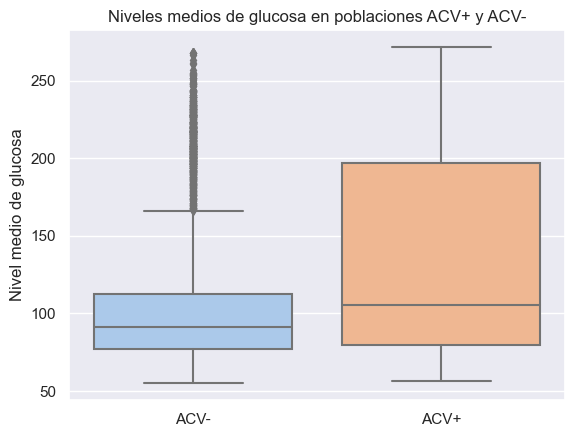

In [246]:
g6 = sns.boxplot(data=df_stroke, x='stroke', y='avg_glucose_level', palette='pastel') 
g6.set(title='Niveles medios de glucosa en poblaciones ACV+ y ACV-', ylabel ='Nivel medio de glucosa', xlabel='' )
g6.set_xticklabels(['ACV-', 'ACV+'])

Parece haber una tendencia a mayores niveles de azucar en la población ACV+, si bien en la poblacón ACV- se ven muchos outliers por encima del tercer cuartil.

### ¿Hay relación entre el indice de masa corporal y la incidencia de ACV?
Otra de las variables relacionadas con la incidencia de ACV fue el indice de masa corporal(BMI). El índice de masa corporal (IMC) se utiliza comúnmente como una medida para evaluar si una persona tiene un peso saludable en relación con su altura. Se calcula dividiendo el peso de una persona en kilogramos por el cuadrado de su altura en metros. Un **IMC entre 18,5 y 24,9 se considera saludable para adultos**.

[Text(0, 0, 'ACV-'), Text(1, 0, 'ACV+')]

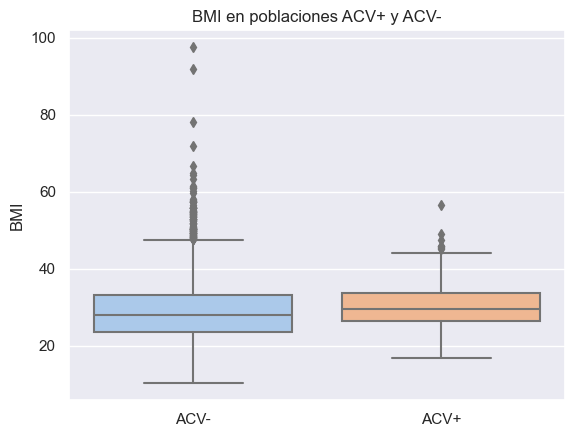

In [247]:
g7 = sns.boxplot(x='stroke', y='bmi', data=df_stroke, palette='pastel')
g7.set(title='BMI en poblaciones ACV+ y ACV-', ylabel ='BMI', xlabel='')
g7.set_xticklabels(['ACV-', 'ACV+'])

Hay una ligera tendencia de un mayor BMI en la mediana del grupo que sufrio ACV. Igualmente esta dentro de los cuartiles del grupo sin ACV por lo que podria no ser estadisticamente significativo.

# Insights

Se realizó un análisis de datos exploratorio a un Dataset de datos etiquetados de pacientes ACV+ y ACV-. 
En primer lugar se observo que el género no parece presentar diferencias entre las poblaciones ACV+ y ACV-. La relación entre fumar y la incidencia de ACV, si bien no parece estar relacionada directamente a primera vista, no se puede descartar totalmente hasta analizar más en profundidad los datos, en parte también por los conocidos efectos adversos del cigarrillo.

Las variables categóricas como el tipo de residencia, el estado civil y el tipo de trabajo, parecen tener una relación con la incidencia de ACV. 

Por otro lado, la población ACV+ mostró niveles mayores de azúcar en sangre y una tendencia a un mayor índice de masa corporal que el grupo ACV-, lo que podria indicar una correlación entre la alimentación y la incidencia de ACV.

Finalmente, hay una clara correlación entre la edad y los sucesos de ACV. La gran mayoria de ACV se dieron a edades más avanzadas.

# Modelado

Posteriormente, se continuó con la generación de un modelo predictivo.

In [248]:
# Se elimina la columna genero porque no afecta al modelo
df_stroke.drop(['gender'], axis=1, inplace=True)

### Conversión de variables categóricas a numéricas

Para la correcta aplicación del modelo, se deben pasar las variables categoricas a variables númericas, que representen esta categorias con valores binarios

In [249]:
# Se conviertes variables a númericas
df_stroke = pd.get_dummies(df_stroke, columns=['smoking_status', 'ever_married', 'work_type', 'Residence_type'])
df_stroke

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,ever_married_No,ever_married_Yes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban
0,67.0,0,1,228.69,36.6,1,0,1,0,0,0,1,0,0,1,0,0,0,1
1,61.0,0,0,202.21,36.6,1,0,0,1,0,0,1,0,0,0,1,0,1,0
2,80.0,0,1,105.92,32.5,1,0,0,1,0,0,1,0,0,1,0,0,1,0
3,49.0,0,0,171.23,34.4,1,0,0,0,1,0,1,0,0,1,0,0,0,1
4,79.0,1,0,174.12,24.0,1,0,0,1,0,0,1,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,80.0,1,0,83.75,18.6,0,0,0,1,0,0,1,0,0,1,0,0,0,1
5106,81.0,0,0,125.20,40.0,0,0,0,1,0,0,1,0,0,0,1,0,0,1
5107,35.0,0,0,82.99,30.6,0,0,0,1,0,0,1,0,0,0,1,0,1,0
5108,51.0,0,0,166.29,25.6,0,0,1,0,0,0,1,0,0,1,0,0,1,0


In [250]:
X = df_stroke.drop(columns='stroke')    
y = df_stroke['stroke']
# Muestro las variables dependientes
X.columns

Index(['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi',
       'smoking_status_Unknown', 'smoking_status_formerly smoked',
       'smoking_status_never smoked', 'smoking_status_smokes',
       'ever_married_No', 'ever_married_Yes', 'work_type_Govt_job',
       'work_type_Never_worked', 'work_type_Private',
       'work_type_Self-employed', 'work_type_children', 'Residence_type_Rural',
       'Residence_type_Urban'],
      dtype='object')

Seleccionamos la variable objetivo(y) y las variables independientes(X).

In [251]:
# Importo módulos y librerias necesarios
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import accuracy_score, classification_report
from sklearn.utils import resample

import sys
import joblib

# defino un modo que le falta
sys.modules['sklearn.externals.joblib'] = joblib

import warnings
warnings.filterwarnings('ignore')

[Text(0, 0, 'ACV-'), Text(1, 0, 'ACV+')]

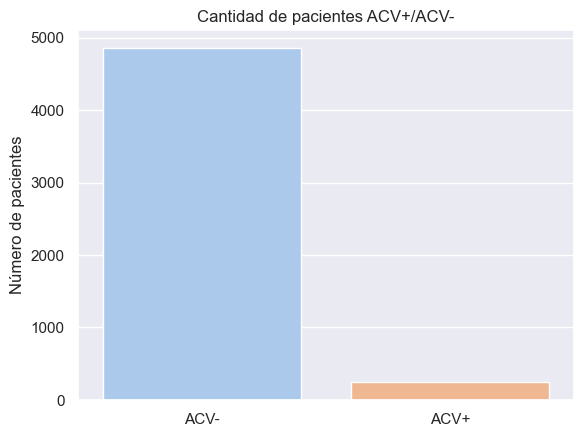

In [252]:
g8 = sns.countplot(data=df_stroke, x='stroke', palette='pastel')
g8.set(title='Cantidad de pacientes ACV+/ACV-', ylabel ='Número de pacientes', xlabel='')
g8.set_xticklabels(['ACV-', 'ACV+'])


In [253]:
from imblearn.over_sampling import SMOTE
from sklearn.datasets import make_classification
from collections import Counter


smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)


[Text(0, 0, 'ACV-'), Text(1, 0, 'ACV+')]

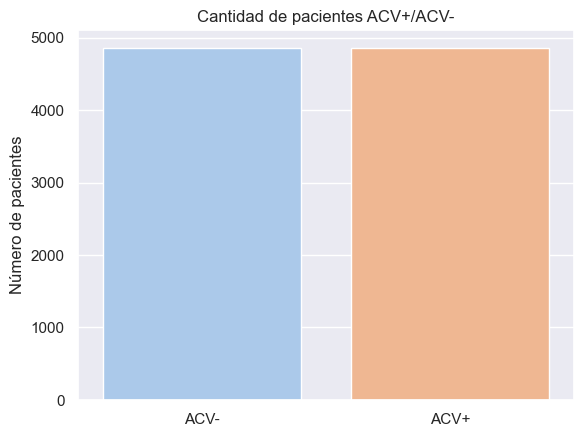

In [254]:
g = sns.countplot( x=y_resampled, palette='pastel')
g.set(title='Cantidad de pacientes ACV+/ACV-', ylabel ='Número de pacientes', xlabel='')
g.set_xticklabels(['ACV-', 'ACV+'])

In [255]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=2, shuffle=True)

In [256]:
# subo iteraciones del modelo pq sino no anda. La otra es normalizar o escalar data
log_reg = LogisticRegression(max_iter=1000)

In [257]:
log_reg.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

### Evaluación del modelo

In [258]:
y_pred = log_reg.predict(X_test)

#### F1 score del modelo
El F1 score es una métrica comúnmente utilizada para evaluar la precisión de un modelo de clasificación.

In [259]:
from sklearn.metrics import f1_score

f1 = f1_score(y_test, y_pred)
print("El f1 score del modelo es:", f1)

El f1 score del modelo es: 0.9526542324246772


#### Recall del modelo
El recall es una métrica comúnmente utilizada para evaluar el rendimiento de un modelo de clasificación. El recall se define como la proporción de verdaderos positivos (TP) que se identifican correctamente entre todos los verdaderos positivos y falsos negativos (FN) en el conjunto de datos

In [260]:
from sklearn.metrics import recall_score

recall = recall_score(y_test, y_pred)
print("El recall es:", recall)

El recall es: 0.9152308752584425


Matriz de confusión:
[[1456    9]
 [ 123 1328]]


[Text(0, 0.5, 'ACV-'), Text(0, 1.5, 'ACV+')]

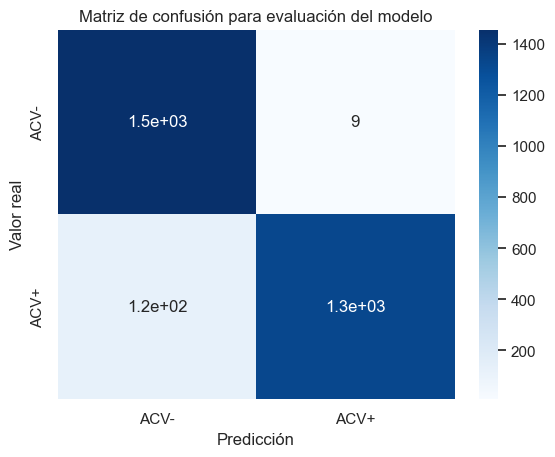

In [261]:
from sklearn.metrics import confusion_matrix

# Crear la matriz de confusión
confusion_mtx = confusion_matrix(y_test, y_pred)

# Imprimir la matriz de confusión
print("Matriz de confusión:")
print(confusion_mtx)

g = sns.heatmap(confusion_mtx, annot=True, cmap='Blues')
g.set(title='Matriz de confusión para evaluación del modelo', ylabel ='Valor real', xlabel='Predicción')
g.set_xticklabels(['ACV-', 'ACV+']) 
g.set_yticklabels(['ACV-', 'ACV+'])